<a href="https://colab.research.google.com/github/Nickruti/Advanced_Python/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['sex'], prefix = "sex")
e = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis = 1)

In [4]:
df_copy = df.drop(columns = ['cp', 'thal', 'slope', 'sex', 'restecg'])
df_copy.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,sex_0,sex_1,restecg_0,restecg_1,restecg_2
0,63,145,233,1,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
1,37,130,250,0,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0
3,56,120,236,0,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,57,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0


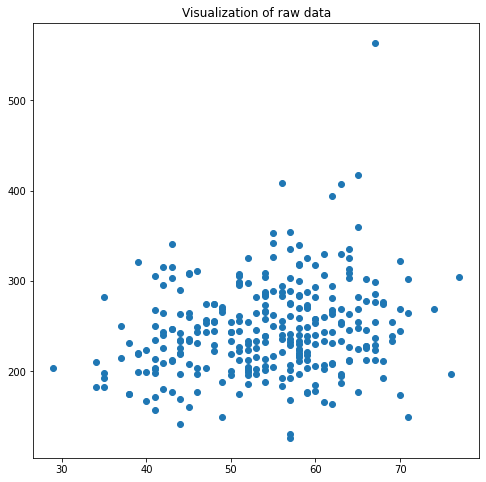

In [5]:
plt.figure(figsize=(8, 8))

X = df_copy['age']
y = df_copy['chol']
plt.scatter(X, y)
plt.xlabel('')
plt.ylabel('')
plt.title('Visualization of raw data');

In [6]:
data = df_copy[['age', 'chol']]
X_std = StandardScaler().fit_transform(data)

In [7]:
km = KMeans(n_clusters=3, max_iter = 200, random_state = 0)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
labels_ = km.predict(X_std)
labels_

array([0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0,
       0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0,

Text(0.5, 1.0, 'Cluster visualization')

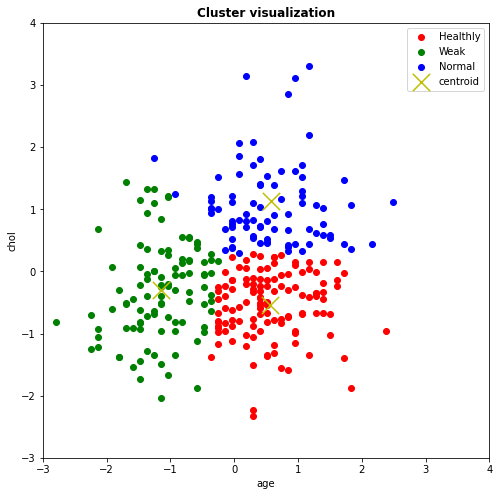

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='r', label='Healthly')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='g', label='Weak')
plt.scatter(X_std[labels_ == 2, 0], X_std[labels_ == 2, 1],
            c='b', label='Normal')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', s=300,
            c='y', label='centroid')
plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Cluster visualization', fontweight='bold')